1.
    Импортируйте библиотеки pandas, numpy и matplotlib.
    Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn. Создайте датафреймы X и y из этих данных.
    Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
    Масштабируйте данные с помощью StandardScaler.
    Постройте модель TSNE на тренировочных данных с параметрами: n_components=2, learning_rate=250, random_state=42.
    Постройте диаграмму рассеяния на этих данных.

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE

In [2]:
%config InlineBackend.figure_format='svg'
%matplotlib inline


In [3]:
from sklearn.datasets import load_boston
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [4]:
data= boston.data
target= boston.target
feature_names= boston.feature_names
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [5]:
X= pd.DataFrame(data, columns=feature_names)
y= pd.DataFrame(target, columns=['price'])

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=.2, random_state=42)

In [6]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)


In [13]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

In [14]:
X_train_tsne = tsne.fit_transform(X_train_scaled)

In [15]:
X_train_tsne.shape

(404, 2)

In [20]:
X_train_tsne[1,:].shape

(2,)

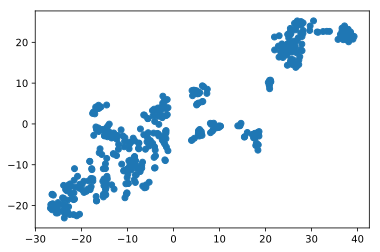

In [21]:
plt.pyplot.scatter(X_train_tsne[:,0], X_train_tsne[:,1])

2.
    С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, используйте все признаки из датафрейма X_train.
    Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE, и раскрасьте точки из разных кластеров разными цветами.

Вычислите средние значения price и CRIM в разных кластерах.

In [22]:
from sklearn.cluster import KMeans

In [23]:
kmeans = KMeans(n_clusters= 3)

In [25]:
labels_train = kmeans.fit_predict(X_train_scaled)

In [26]:
pd.value_counts(labels_train)

0    191
1    127
2     86
dtype: int64

In [27]:
labels_test = kmeans.fit_predict(X_test_scaled)

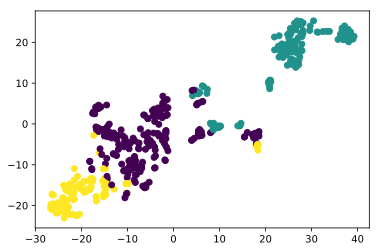

In [29]:
plt.pyplot.scatter(X_train_tsne[:,0], X_train_tsne[:,1], c = labels_train)

In [30]:
y_train.mean()

price    22.796535
dtype: float64

In [31]:
y_train[labels_train== 0].mean()

price    24.958115
dtype: float64

In [32]:
y_train[labels_train== 1].mean()

price    16.165354
dtype: float64

In [33]:
y_train[labels_train== 2].mean()

price    27.788372
dtype: float64

In [39]:
from sklearn.ensemble import RandomForestRegressor

In [54]:
model = RandomForestRegressor(n_estimators=1000, max_depth=12, random_state=42)
model.fit(X_train, y_train.values[:, 0])
model.feature_importances_[0]

0.03666062400361198

In [55]:
model0 = RandomForestRegressor(n_estimators=1000, max_depth=12, random_state=42)
model0.fit(X_train[labels_train== 0], y_train.values[labels_train== 0][:, 0])
model0.feature_importances_[0]

0.013211999784904897

In [56]:
model1 = RandomForestRegressor(n_estimators=1000, max_depth=12, random_state=42)
model1.fit(X_train[labels_train== 1], y_train.values[labels_train== 1][:, 0])
model1.feature_importances_[0]

0.04661672181618127

In [57]:
model2 = RandomForestRegressor(n_estimators=1000, max_depth=12, random_state=42)
model2.fit(X_train[labels_train== 2], y_train.values[labels_train== 2][:, 0])
model2.feature_importances_[0]

0.008205651090238133

3.Примените модель KMeans, построенную в предыдущем задании, к данным из тестового набора. Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [58]:
from sklearn.cluster import KMeans

In [59]:
kmeans = KMeans(n_clusters= 3)

In [60]:
labels_test = kmeans.fit_predict(X_test_scaled)

In [64]:
pd.value_counts(labels_test)

0    50
2    38
1    14
dtype: int64

In [66]:
labels_test = kmeans.fit_predict(X_test_scaled)
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_test_tsne = tsne.fit_transform(X_test_scaled)
X_test_tsne.shape

(102, 2)

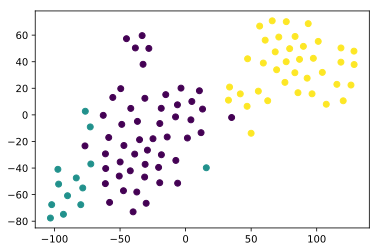

In [67]:
plt.pyplot.scatter(X_test_tsne[:,0], X_test_tsne[:,1], c = labels_test)

In [68]:
y_test.mean()

price    21.488235
dtype: float64

In [70]:
y_test[labels_test== 0].mean()

price    21.717647
dtype: float64

In [71]:
y_test[labels_test== 1].mean()

price    34.553846
dtype: float64

In [72]:
y_test[labels_test== 2].mean()

price    16.710526
dtype: float64

In [73]:
from sklearn.ensemble import RandomForestRegressor

In [74]:
model = RandomForestRegressor(n_estimators=1000, max_depth=12, random_state=42)
model.fit(X_test, y_test.values[:, 0])
model.feature_importances_[0]

0.05262316516645974

In [75]:
model0 = RandomForestRegressor(n_estimators=1000, max_depth=12, random_state=42)
model0.fit(X_test[labels_test== 0], y_test.values[labels_test== 0][:, 0])
model0.feature_importances_[0]

0.12379455863610012

In [76]:
model1 = RandomForestRegressor(n_estimators=1000, max_depth=12, random_state=42)
model1.fit(X_test[labels_test== 1], y_test.values[labels_test== 1][:, 0])
model1.feature_importances_[0]

0.009511308961182421

In [77]:
model2 = RandomForestRegressor(n_estimators=1000, max_depth=12, random_state=42)
model2.fit(X_test[labels_test== 2], y_test.values[labels_test== 2][:, 0])
model2.feature_importances_[0]

0.11424435230854064